##Implementing Gradient Descent and exploring its effects on regularized and non-regularized functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gradient_ascent import GradientAscent
from regression_functions import log_likelihood, log_likelihood_gradient, \
                                 predict, accuracy, precision, recall
from sklearn.linear_model import LogisticRegression
%matplotlib inline
import pdb

In [11]:
data = np.genfromtxt('data/testdata.csv', delimiter=',')
X = data[:,0:2]
y = data[:,2]

In [3]:
x1_pos = X[:,0][y>0]
x2_pos = X[:,1][y>0]
x1_neg = X[:,0][y == 0]
x2_neg = X[:,1][y == 0]

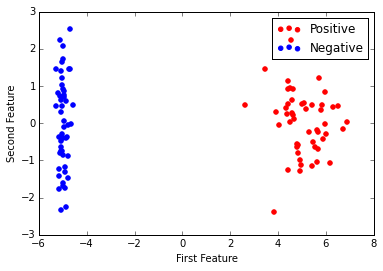

In [4]:
plt.scatter(x1_pos,x2_pos, color = 'r', label = 'Positive')
plt.scatter(x1_neg,x2_neg, color = 'b', label = 'Negative')
plt.xlabel('First Feature')
plt.ylabel('Second Feature')
plt.legend()

####Implemting cost function and gradient ascent. Testing with a simple example. 

The cost function is the *log likelihood*. Our goal will be to *maximize* this value, so we will actually be implementing gradient *ascent*.

![Cost Function](images/logit_cost_function.gif)

Recall that the hypothesis function *h* is defined as follows:

![hypothesis](images/logit_sigmoid.gif)

You will also need to have a function which calculates the gradient of the cost function, which is as follows.

![gradient](images/logit_gradient.gif)

In [5]:
X = np.array([[0, 1], [2, 2]])
y = np.array([1, 0])
coeffs = np.array([1, 1])
log_likelihood(X, y, coeffs)

-4.3314116154360329

In [6]:
# Gradient Ascent
ga = GradientAscent(log_likelihood, log_likelihood_gradient, predict)
ga.run(X, y, step_size=.0001)
print "Results from Gradient Ascent implementation:"
print "  coeffs:", ga.coeffs
y_pred = ga.predict(X)
print "  accuracy:", accuracy(y, y_pred)
print "  precision:", precision(y, y_pred)
print "  recall:", recall(y, y_pred)

Results from Gradient Ascent implementation:
  coeffs: [ 2.8876749  -4.38078995  0.69727993]
  accuracy: 1.0
  precision: 1.0
  recall: 1.0


In [8]:
# Stochastic Gradient Ascent
sga = GradientAscent(log_likelihood, log_likelihood_gradient, predict)
sga.sgd_run(X, y)
print "Results from Stochastic Gradient Ascent implementation:"
print "  coeffs:", sga.coeffs
y_pred = sga.predict(X)
print "  accuracy:", accuracy(y, y_pred)
print "  precision:", precision(y, y_pred)
print "  recall:", recall(y, y_pred)

Results from Stochastic Gradient Ascent implementation:
  coeffs: [ 2.88771268 -4.38088637  0.69726949]
  accuracy: 1.0
  precision: 1.0
  recall: 1.0


In [9]:
# sklearn's Logistic Regression
lr = LogisticRegression()
lr.fit(X, y)
print "Results from sklearn Logistic Regression:"
print "  coeffs:", lr.intercept_[0], lr.coef_[0][0], lr.coef_[0][1]

Results from sklearn Logistic Regression:
  coeffs: 0.199560772895 -0.535180361599 -0.0680294079043


In [10]:
# Gradient Ascent with regularization
likelihood_regularized = lambda X, y, coeffs: \
                         log_likelihood(X, y, coeffs, l=10)
gradient_regularized = lambda X, y, coeffs: \
                       log_likelihood_gradient(X, y, coeffs, l=1)
gar = GradientAscent(likelihood_regularized, gradient_regularized, predict)
gar.run(X, y)
print "Results from Gradient Ascent with regularization"
print "  coeffs:", gar.coeffs
y_pred = gar.predict(X)
print "  accuracy:", accuracy(y, y_pred)
print "  precision:", precision(y, y_pred)
print "  recall:", recall(y, y_pred)

Results from Gradient Ascent with regularization
  coeffs: [ 0.08565445 -0.32670159 -0.07769635]
  accuracy: 1.0
  precision: 1.0
  recall: 1.0


####Since there are many different dividing plane. The results are quite different from sklearn's implementation. Regularized is the closest

###Testing with original testdata

In [12]:
data = np.genfromtxt('data/testdata.csv', delimiter=',')
X = data[:,0:2]
y = data[:,2]

In [13]:
log_likelihood(X, y, coeffs)

-1.3417114164204169

In [14]:
# Gradient Ascent
ga = GradientAscent(log_likelihood, log_likelihood_gradient, predict)
ga.run(X, y, step_size=.0001)
print "Results from Gradient Ascent implementation:"
print "  coeffs:", ga.coeffs
y_pred = ga.predict(X)
print "  accuracy:", accuracy(y, y_pred)
print "  precision:", precision(y, y_pred)
print "  recall:", recall(y, y_pred)

Results from Gradient Ascent implementation:
  coeffs: [ 0.03835756  1.59713955  0.01972872]
  accuracy: 1.0
  precision: 1.0
  recall: 1.0


In [15]:
# Stochastic Gradient Ascent
sga = GradientAscent(log_likelihood, log_likelihood_gradient, predict)
sga.sgd_run(X, y)
print "Results from Stochastic Gradient Ascent implementation:"
print "  coeffs:", sga.coeffs
y_pred = sga.predict(X)
print "  accuracy:", accuracy(y, y_pred)
print "  precision:", precision(y, y_pred)
print "  recall:", recall(y, y_pred)

Results from Stochastic Gradient Ascent implementation:
  coeffs: [ 0.03836344  1.5971283   0.01975378]
  accuracy: 1.0
  precision: 1.0
  recall: 1.0


In [16]:
# sklearn's Logistic Regression
lr = LogisticRegression()
lr.fit(X, y)
print "Results from sklearn Logistic Regression:"
print "  coeffs:", lr.intercept_[0], lr.coef_[0][0], lr.coef_[0][1]

Results from sklearn Logistic Regression:
  coeffs: 0.0465275107936 1.23185610298 0.0225170865919


In [17]:
# Gradient Ascent with regularization
likelihood_regularized = lambda X, y, coeffs: \
                         log_likelihood(X, y, coeffs, l=10)
gradient_regularized = lambda X, y, coeffs: \
                       log_likelihood_gradient(X, y, coeffs, l=1)
gar = GradientAscent(likelihood_regularized, gradient_regularized, predict)
gar.run(X, y)
print "Results from Gradient Ascent with regularization"
print "  coeffs:", gar.coeffs
y_pred = gar.predict(X)
print "  accuracy:", accuracy(y, y_pred)
print "  precision:", precision(y, y_pred)
print "  recall:", recall(y, y_pred)

Results from Gradient Ascent with regularization
  coeffs: [ 0.03035581  1.10588056  0.01536472]
  accuracy: 1.0
  precision: 1.0
  recall: 1.0


####Since there are again many different dividing plane. The results are quite different from sklearn's implementation. 

###Testing On Grad School Data

In [2]:
grad_df = pd.read_csv('data/grad.csv')

In [3]:
y = grad_df.admit.values
X = grad_df.drop('admit', axis=1).values
X.shape

(400, 3)

In [4]:
# Gradient Ascent
ga = GradientAscent(log_likelihood, log_likelihood_gradient, predict, scale=True)
ga.run(X, y, num_iterations=100000)
print "Results from Gradient Ascent implementation:"
print "  coeffs:", ga.coeffs
y_pred = ga.predict(X)
print "  accuracy:", accuracy(y, y_pred)
print "  precision:", precision(y, y_pred)
print "  recall:", recall(y, y_pred)

Results from Gradient Ascent implementation:
  coeffs: [-2.68792228  1.40987806  1.78138334 -1.40600439]
  accuracy: 0.705
  precision: 0.6
  recall: 0.212598425197


In [4]:
# Stochastic Gradient Ascent
sga = GradientAscent(log_likelihood, log_likelihood_gradient, predict)
sga.sgd_run(X, y, step_size=.001)
print "Results from Stochastic Gradient Ascent implementation:"
print "  coeffs:", sga.coeffs
y_pred = sga.predict(X)
print "  accuracy:", accuracy(y, y_pred)
print "  precision:", precision(y, y_pred)
print "  recall:", recall(y, y_pred)

> /Users/Warren/GitHub/data_science_knowledge/gradient_descent/gradient_ascent.py(76)sgd_run()
-> self.coeffs = np.zeros(X.shape[1])
(Pdb) c
Results from Stochastic Gradient Ascent implementation:
  coeffs: [-0.04522513  0.00772274 -0.06986325 -0.38252642]
  accuracy: 0.3175
  precision: 0.3175
  recall: 1.0


In [8]:
# sklearn's Logistic Regression
lr = LogisticRegression()
lr.fit(X, y)
print "Results from sklearn Logistic Regression:"
print "  coeffs:", lr.intercept_[0], lr.coef_[0]
y_pred = lr.predict(X)
print "  accuracy:", accuracy(y, y_pred)
print "  precision:", precision(y, y_pred)
print "  recall:", recall(y, y_pred)

Results from sklearn Logistic Regression:
  coeffs: -1.18847875568 [ 0.00191577  0.21564289 -0.59842009]
  accuracy: 0.715
  precision: 0.651162790698
  recall: 0.220472440945


In [9]:
# Gradient Ascent with regularization
likelihood_regularized = lambda X, y, coeffs: \
                         log_likelihood(X, y, coeffs, l=10)
gradient_regularized = lambda X, y, coeffs: \
                       log_likelihood_gradient(X, y, coeffs, l=1)
gar = GradientAscent(likelihood_regularized, gradient_regularized, predict, scale=True)
gar.run(X, y, num_iterations=100000)
print "Results from Gradient Ascent with regularization"
print "  coeffs:", gar.coeffs
y_pred = gar.predict(X)
print "  accuracy:", accuracy(y, y_pred)
print "  precision:", precision(y, y_pred)
print "  recall:", recall(y, y_pred)

Results from Gradient Ascent with regularization
  coeffs: [-0.97053865  0.76129108  0.40038977 -1.27163495]
  accuracy: 0.705
  precision: 0.645161290323
  recall: 0.157480314961


####SGD was not able to converge. Gradient Ascent and Gradient Ascent with regularization did best.

###Newton's Method

In [198]:
def newton(f,f_p,f_pp,tol):
    error = tol+1
    x_0 =1
    while error > tol:
        print x_0
        x_0 -= f_p(x_0)/float(f_pp(x_0))
        error = f_p(x_0)
    return x_0

In [199]:
def f(x):
    return 6*x**2+3*x-10
def f_p(x):
    return 12*x + 3
def f_pp(x):
    return 12

In [201]:
newton(f,f_p,f_pp, tol=0.001)

1


-0.25